In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读取形状文件
shapefile_path = 'data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp'
gdf = gpd.read_file(shapefile_path)

# 读取CSV文件
csv_path = 'data/crime.csv'
csv_df = pd.read_csv(csv_path)

# 打印数据以检查
print(gdf)

       LSOA11CD                   LSOA11NM   MSOA11CD  \
0     E01000001        City of London 001A  E02000001   
1     E01000002        City of London 001B  E02000001   
2     E01000003        City of London 001C  E02000001   
3     E01000005        City of London 001E  E02000001   
4     E01000006  Barking and Dagenham 016A  E02000017   
...         ...                        ...        ...   
4830  E01033742             Greenwich 007F  E02000319   
4831  E01033743             Greenwich 002H  E02000314   
4832  E01033744             Greenwich 007G  E02000319   
4833  E01033745             Greenwich 002I  E02000314   
4834  E01033746             Greenwich 038E  E02006931   

                      MSOA11NM    LAD11CD               LAD11NM    RGN11CD  \
0           City of London 001  E09000001        City of London  E12000007   
1           City of London 001  E09000001        City of London  E12000007   
2           City of London 001  E09000001        City of London  E12000007   
3  

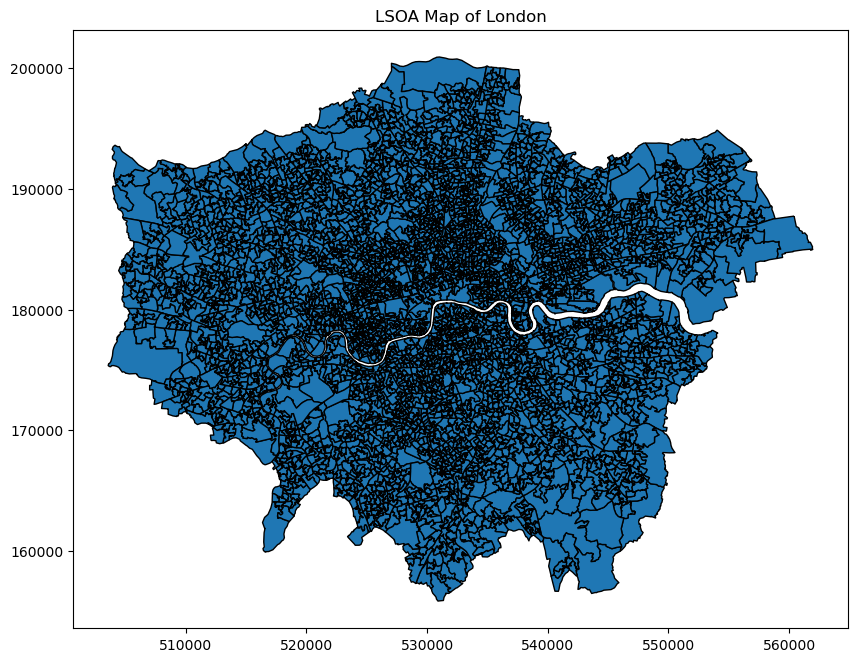

In [3]:
# 创建一个图形对象
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 绘制地图
gdf.plot(ax=ax, edgecolor='black')

# 设置标题
ax.set_title('LSOA Map of London')

# 显示地图
plt.show()

In [4]:
print("ShapeFile 列名:", gdf.columns)
print("CSV 列名:", csv_df.columns)

ShapeFile 列名: Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry'],
      dtype='object')
CSV 列名: Index(['LSOA Code', '2011_summary', '2021_summary', 'Population_2021',
       'Population_2011', 'crime_2011', 'crime_2021'],
      dtype='object')


In [5]:
# 合并两个数据集，按LSOA11CD和LSOA Code列进行合并
merged_df = gdf.merge(csv_df, left_on='LSOA11CD', right_on='LSOA Code', how='left')

# 处理指定LSOA11CD的空值
specific_lsoas = ['E09000001']
for lsoa in specific_lsoas:
    merged_df.loc[merged_df['LAD11CD'] == lsoa] = merged_df.loc[merged_df['LAD11CD'] == lsoa].fillna(-1)

# 剩余列的空值用列的平均值填补
for column in merged_df.columns:
    if merged_df[column].dtype in ['float64', 'int64']:  # 只填补数值列
        mean_value = merged_df[column].mean()
        merged_df[column].fillna(mean_value, inplace=True)

# 保存结果到新的csv文件
merged_df.to_csv('data/crime_shp.csv', index=False)

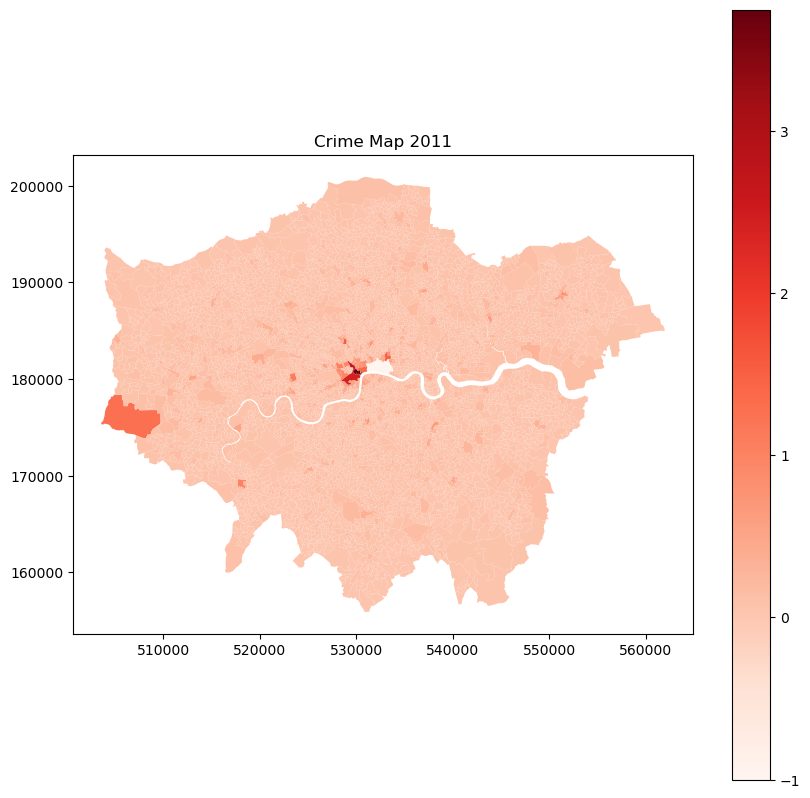

In [6]:
# 处理LAD11CD列为E09000001的行
# merged_df['color'] = merged_df['LAD11CD'].apply(lambda x: 'green' if x == 'E09000001' else None)

# 绘制crime_2011地图
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
base = merged_df.plot(column='crime_2011', cmap='Reds', legend=True, ax=ax, 
                      missing_kwds={'color': 'lightgrey'})
# merged_df[merged_df['color'] == 'green'].plot(color='green', ax=base)
ax.set_title('Crime Map 2011')
plt.savefig('data/crime_map_2011.png')

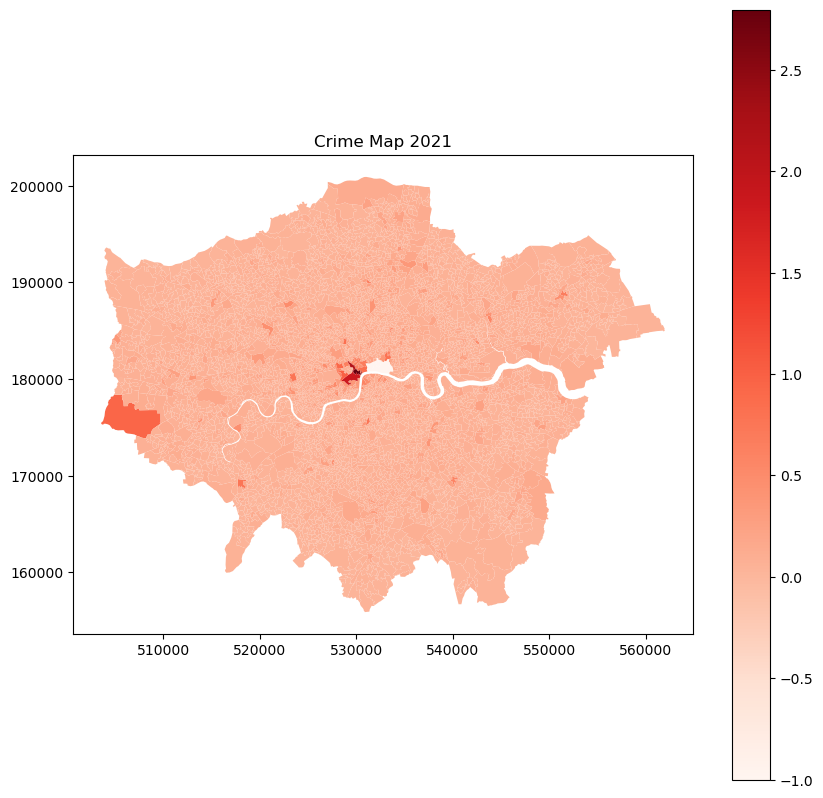

In [7]:
# 绘制crime_2021地图
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
base = merged_df.plot(column='crime_2021', cmap='Reds', legend=True, ax=ax, 
                      missing_kwds={'color': 'lightgrey'})
# merged_df[merged_df['color'] == 'green'].plot(color='green', ax=base)
ax.set_title('Crime Map 2021')
plt.savefig('data/crime_map_2021.png')

Text(0.5, 1.0, 'Change in Crime (2021 - 2011)')

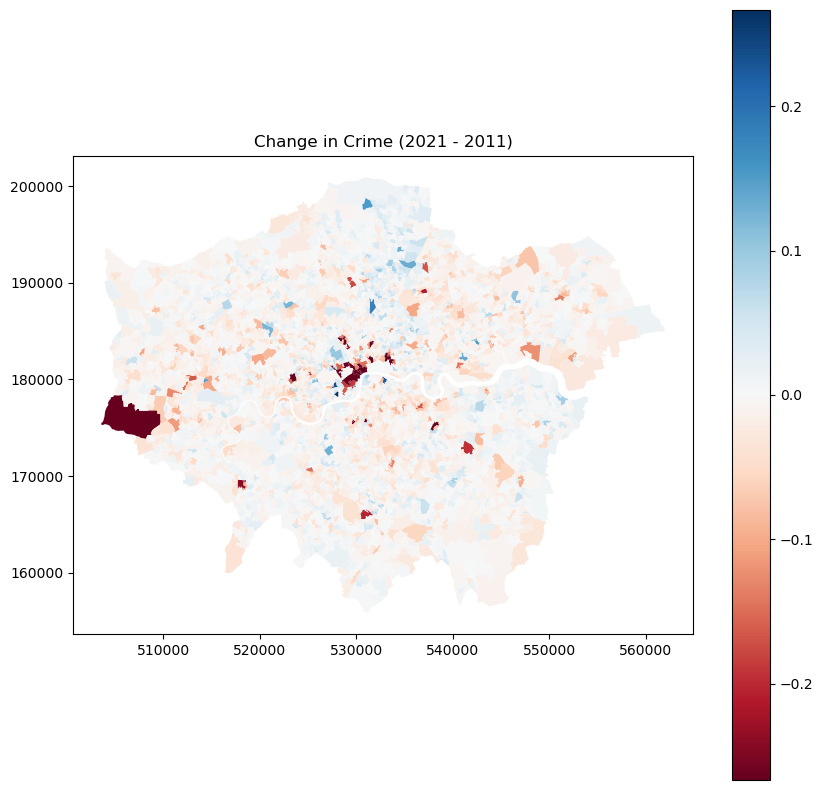

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 计算crime_2021和crime_2011的差值
merged_df['crime_change'] = (merged_df['crime_2021'] - merged_df['crime_2011'])

# 绘制crime变化地图
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 使用TwoSlopeNorm确保0值为中性，并增加上下界限来加深颜色
norm = TwoSlopeNorm(vmin=-abs(merged_df['crime_change'].max()), 
                    vcenter=0, 
                    vmax=abs(merged_df['crime_change'].max()))

# 使用更深的颜色图，例如 'coolwarm_r' 或者 'RdBu'
base = merged_df.plot(column='crime_change', cmap='RdBu', norm=norm, legend=True, ax=ax, 
                      missing_kwds={'color': 'lightgrey'})

ax.set_title('Change in Crime (2021 - 2011)')

#plt.savefig('crime_map_change.png')



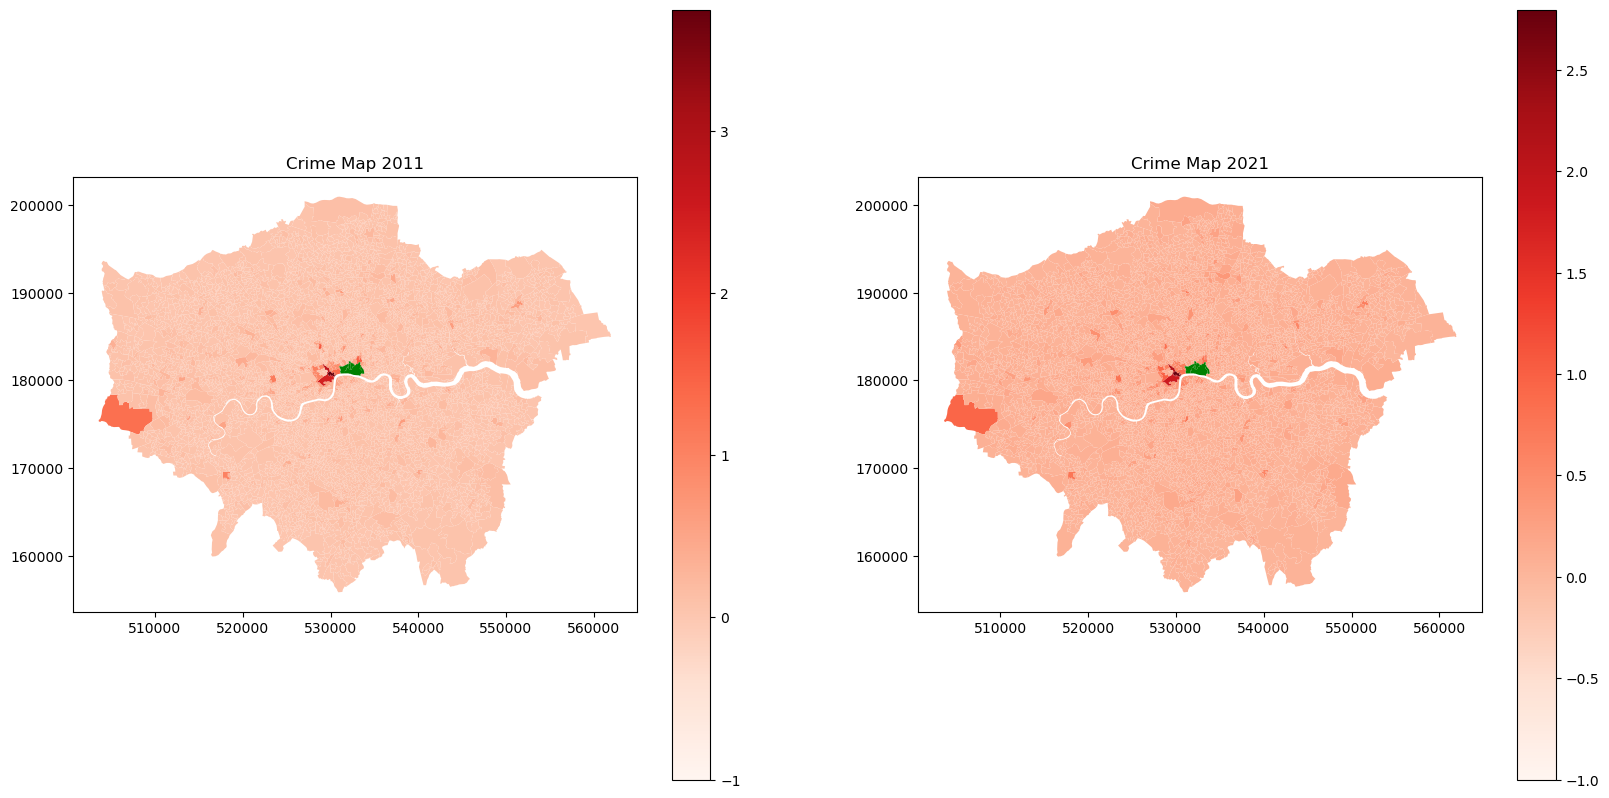

In [10]:
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the 2011 crime map on the first subplot
base1 = merged_df.plot(column='crime_2011', cmap='Reds', legend=True, ax=ax[0], 
                       missing_kwds={'color': 'lightgrey'})
merged_df[merged_df['color'] == 'green'].plot(color='green', ax=base1)
ax[0].set_title('Crime Map 2011')

# Plot the 2021 crime map on the second subplot
base2 = merged_df.plot(column='crime_2021', cmap='Reds', legend=True, ax=ax[1], 
                       missing_kwds={'color': 'lightgrey'})
merged_df[merged_df['color'] == 'green'].plot(color='green', ax=base2)
ax[1].set_title('Crime Map 2021')

# Save the combined figure
plt.savefig('data/crime_map_2011_2021.png')

# Show the plots
plt.show()